## Diamond Price Regression project.
* In this project, we will make predictions of diamond prices based on their attributes. We already have a dataset that contains diamond prices and some of their features and we will analyse the dataset and we will build machine learning model to predict diamond prices.

* We will proceed according to this plan:

       1.Exploratory Data Analysis.
       
       2.Data Preprocessing.
       
       3.Select and Train a Model.
       
       4.Fine-Tune Final Model.

##  Diamond Price Dataset.

* This classic dataset contains the prices and other attributes of almost 54,000 diamonds. these attributes are:

    1. Content price price in US dollars (\$326--\$18,823) **target column**.

    2. carat weight of the diamond (0.2--5.01).

    3. cut quality of the cut (Fair, Good, Very Good, Premium, Ideal).

    4. color diamond colour, from J (worst) to D (best).

    5. clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
    
    6. x length in mm (0--10.74).

    7. y width in mm (0--58.9).

    8. z depth in mm (0--31.8).

    9. depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79).

    10. table width of top of diamond relative to widest point (43--95).



### Importing Libraries.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # to show charts and diagrams.
import seaborn as sns # to to make useful charts.
plt.style.use("ggplot") # to show nice diagrams.

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shai-ml/sample_submission.csv
/kaggle/input/shai-ml/train.csv
/kaggle/input/shai-ml/test.csv


### Loading Data.

In [3]:
train = pd.read_csv("/kaggle/input/shai-ml/train.csv")
test = pd.read_csv("/kaggle/input/shai-ml/test.csv")

In [4]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


# Exploratory Data Analysis.

In [5]:
def shape_of_data(data,name):
    print(f"{name} data") 
    print(f"rows: {data.shape[0]}")
    print(f"columns: {data.shape[1]}")
    print("---------------------------")

In [6]:
shape_of_data(train, "train")
shape_of_data(test, "test")

train data
rows: 43040
columns: 11
---------------------------
test data
rows: 10900
columns: 10
---------------------------


The **Train set** contains 43040 rows and 11 columns and the test set contains 10900 rows and 10 columns.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10900 non-null  int64  
 1   carat       10900 non-null  float64
 2   cut         10900 non-null  object 
 3   color       10900 non-null  object 
 4   clarity     10900 non-null  object 
 5   depth       10900 non-null  float64
 6   table       10900 non-null  float64
 7   x           10900 non-null  float64
 8   y           10900 non-null  float64
 9   z           10900 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 851.7+ KB


* There are two types of data:

    1. Categorical(object) columns which are **cut** , **color** and **clarity**.
    2. Numeirical(flaot) columns which are **x**, **y**, **z**, **table** and **depth**.
    


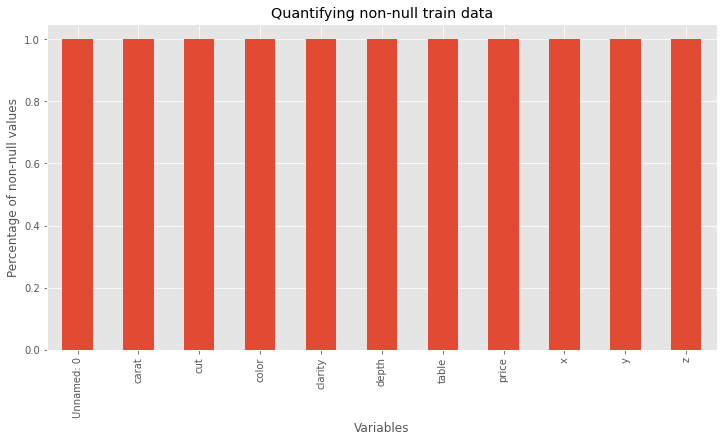

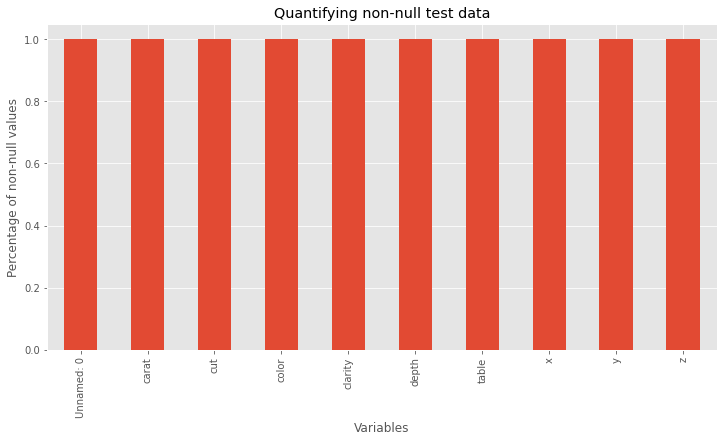

In [9]:
train.notnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of non-null values')
plt.xlabel('Variables')
plt.title('Quantifying non-null train data');
plt.show()

test.notnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of non-null values')
plt.xlabel('Variables')
plt.title('Quantifying non-null test data');
plt.show()

* the train set and the test set don't contain NAN or missing values.

* **Unnamed: 0** column is ID column.It does not give us any important information, so we will remove it.

In [10]:
train.drop("Unnamed: 0", axis=1, inplace=True)
test.drop("Unnamed: 0", axis=1, inplace=True)

### Descriptive Statistics.

In [11]:
train.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Quick insights:
 * the train data has 43040 instances.
 * most of columns have max which is much bigger then their mean and this means there are outliers in the data.
 * price's mean value is **3942.706343** which is much less than max and this means there are outlier values in price column but I think maybe there are diamons which have high prices in real world and we should remove them.





* we will take categorical and numerical columns' names to use them later.

In [12]:
cat_col = train.columns[train.dtypes == object]
num_col = train.columns[train.dtypes != object]

### Analyse Categorical Columns.

* Let's look at The number of unique values in each column.

In [13]:
pd.DataFrame(train[cat_col].nunique(),columns=["unique"])

,unique
cut,5
color,7
clarity,8


* 5 Categories in cut, 7 categories in color and 8 in clarity.

* The ratio of each category in each categorical columns.

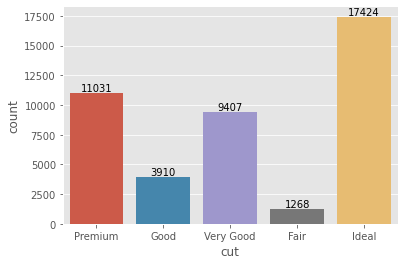

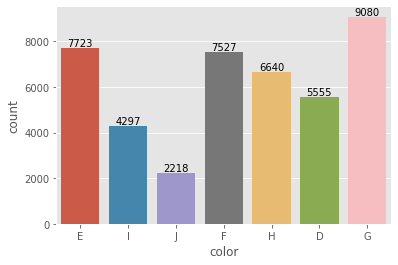

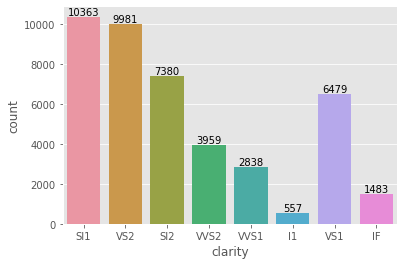

In [14]:
for col in cat_col:
    ax = sns.countplot(x=train[col])
    ax.bar_label(ax.containers[0])
    plt.show()

* The biggest ratio in each categorical column:

      1. Cut column:
      
           * The Ideal ratio is 17422.
           
      2. Color column:
      
           * The G ratio is 9074.
           
      3. Clarity column:
      
           * The SI1 ratio is 10361.

The prices' Mean and Range to each category in each column.

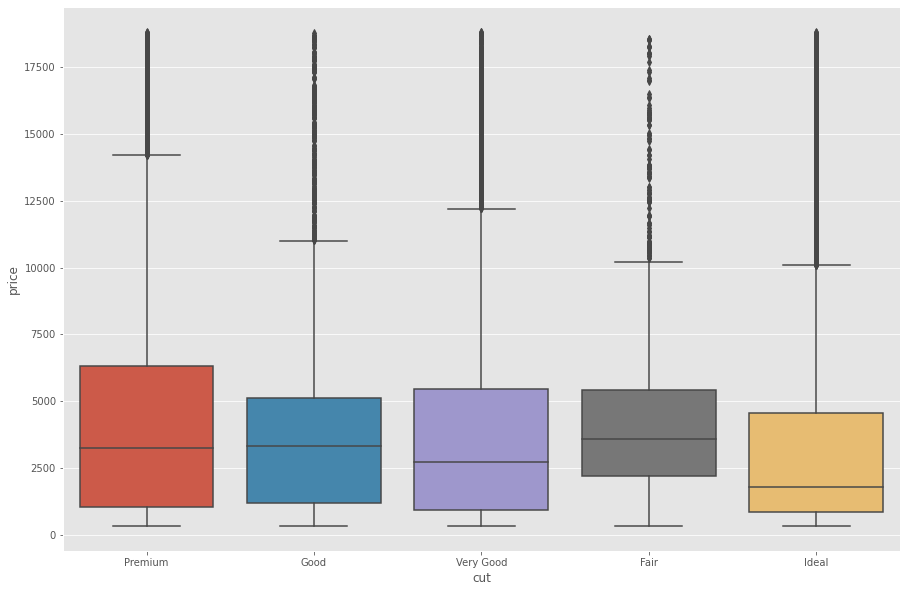

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=train["cut"],
            y=train["price"]);

* fair category has the biggest mean prices while ideal has the least mean prices.

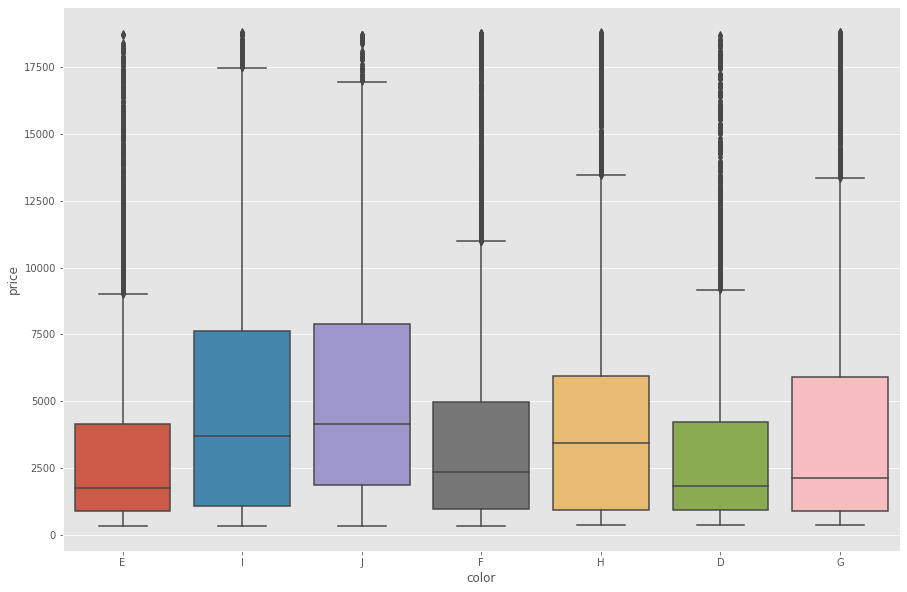

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=train["color"],
            y=train["price"]);

* the j category has the biggest mean prices.

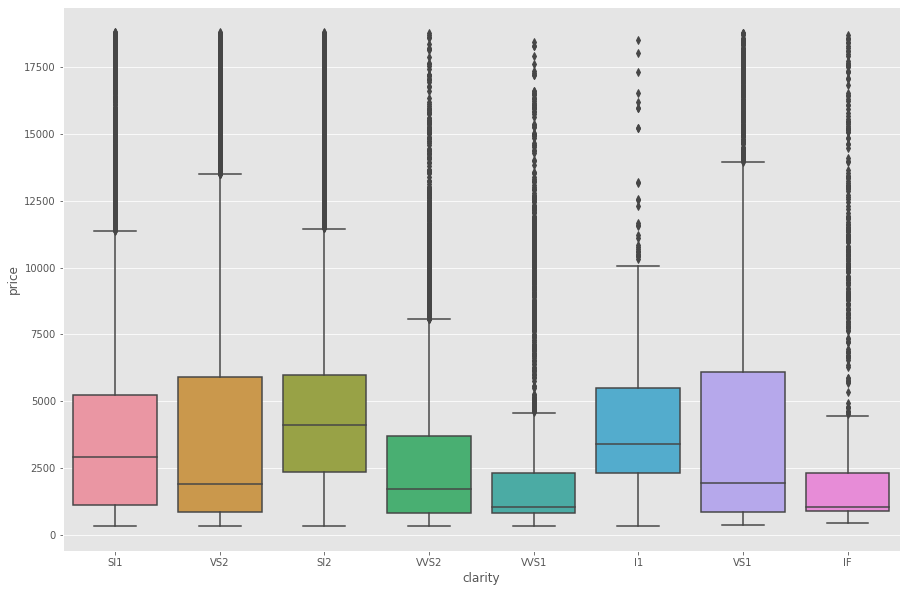

In [17]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=train["clarity"],
            y=train["price"]);

* the SI2 category the biggest mean prices.

* As we see each category in each categorical columns has affected on the price.

* Data distributions in numerical columns.

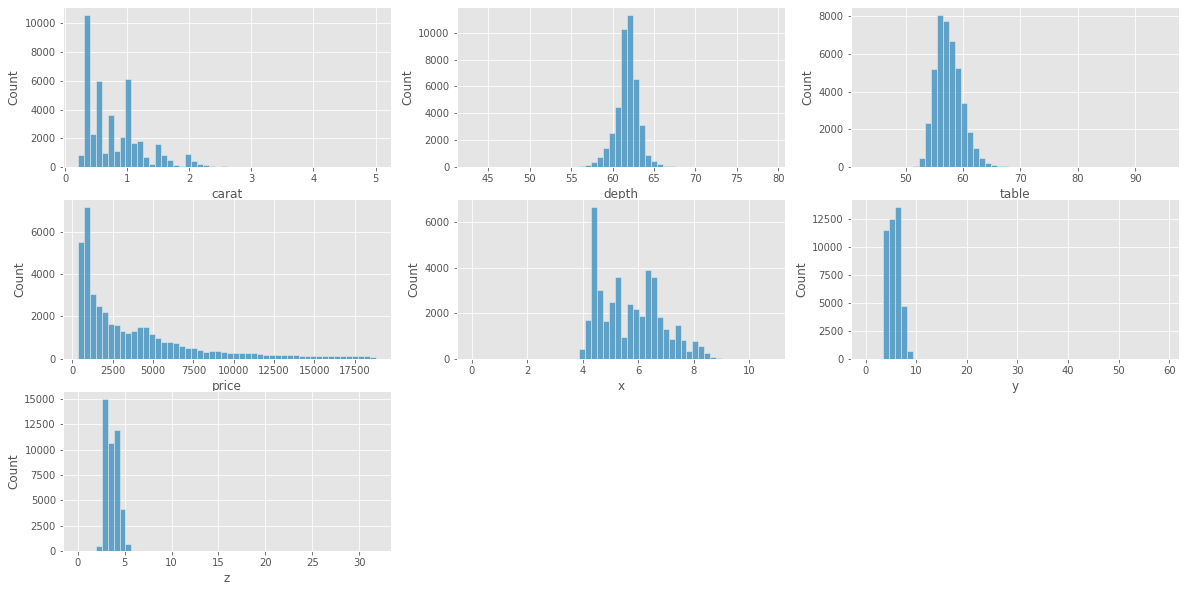

In [18]:
plt.figure(figsize=(20,10))
for i,col in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.histplot(train[col], bins=50)

* Carat weight of the diamond takes values only between 0.2 and 5.01.maybe there are values less than 0.2, but they take values 0.2. so the frequent in 0.2 is quite big.
* depth variable is normal distribution.
* The table and the variable X have skew distribution.  

### clean the data(features) from outliers and remove error values.

* Diamonds have three dimensions:

  1. x is length.
  2. y is width.
  3. z is depth.
  

* So if X, Y or Z have 0, diamonds become two dimensions and this means wrong. So we will remove zeros from x, y and z.

In [19]:
train.drop(train[train["x"]==0].index, inplace=True)
train.drop(train[train["y"]==0].index, inplace=True)
train.drop(train[train["z"]==0].index, inplace=True)  

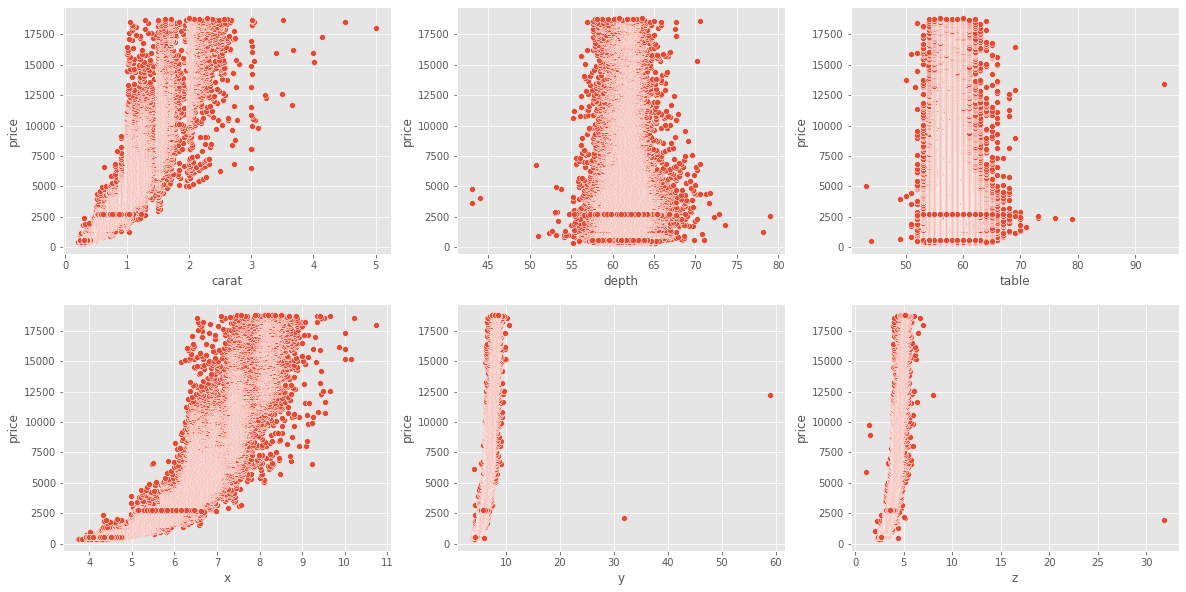

In [20]:
plt.figure(figsize=(20,10))
num_features = [col for col in num_col if col != "price"] 
for i,col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=train[col],
                    y=train["price"])

* From scatterplot charts above, we have seen points that are far away from the middle of the data, so all numerical columns have outliers.
* there many ways to deal with outliers:

1.Remove them from the data.

2.Replace them with mean or median.

3.estimating them by machine learning model.

third way is the best way because it make data more real.

In [21]:
from sklearn.linear_model import LinearRegression # this model for estimating new values instead of outliers.

# detect outliers indices.
idx_out = {"depth":train[(train["depth"]>75)|(train["depth"]<45)].index, 
           "table":train[(train["table"]>80)|(train["table"]<40)].index,
           "z":train[(train["z"]<2)|(train["z"]>6)].index,                                 
           "y":train[train["y"]>15].index,
           "x":train[train["x"]>10.5].index}

drop_train = train.copy() # create a copy from train dara.

# peplace outliers with median in drop_train.
# function for detecting outliers.
def list_of_outliers(data):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    return [d for d in data if d>upper_bound or d<lower_bound]

for col in idx_out.keys():
    drop_train[col]=drop_train[col].replace(
               list_of_outliers(drop_train[col]),
               drop_train[col].median())
    
# build linear Regression model that train on drop_train to estimate outliers in train data.    
for col in idx_out.keys(): 
    pred_col = drop_train.corr()[col].abs().sort_values(ascending=False)[1:4].index # Select the highest three correlations with target variable.
    lr = LinearRegression().fit(drop_train[pred_col],
                                drop_train[col])     # train model on drop_train.
    train.loc[idx_out[col], col] = lr.predict(train.loc[idx_out[col],pred_col]) # put predicted values in train data in outliers' place.

* Let's plot boxplot see the train data again.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

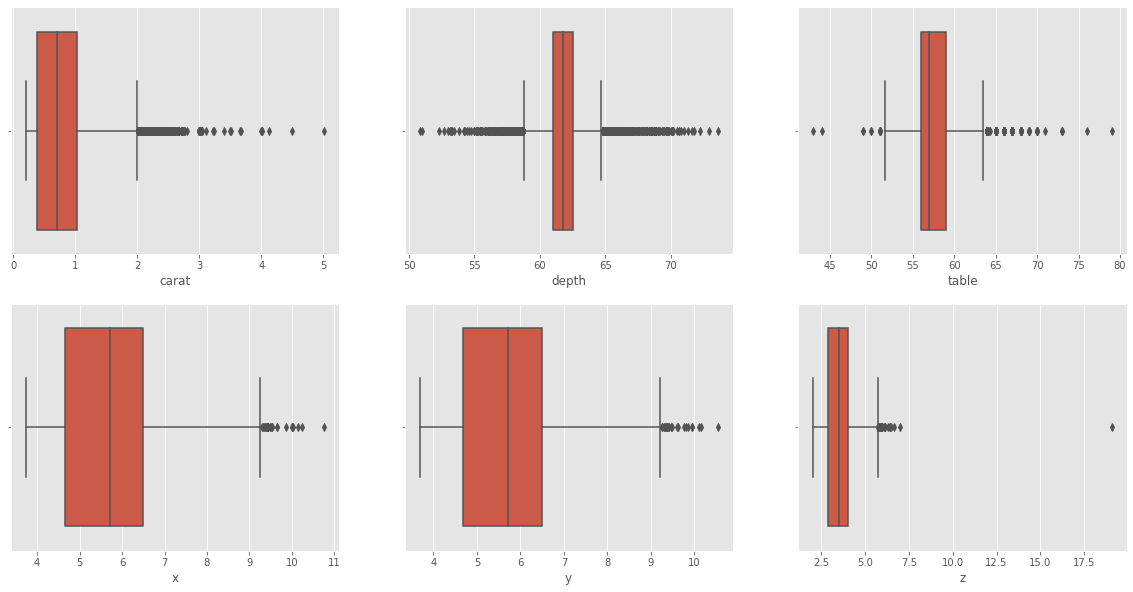

In [22]:
plt.figure(figsize=(20,10))
num_features = [col for col in num_col if col != "price"] 
for i,col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(train[col])

* Now we are seeing the points that are far have decreased.

* we will delete the rest of outliers.

In [23]:
train.drop(train[train["z"]>10].index, inplace=True)
train.drop(train[train["x"]>10.5].index, inplace=True)

### let's look at the correlations between the columns.

<Figure size 720x720 with 0 Axes>

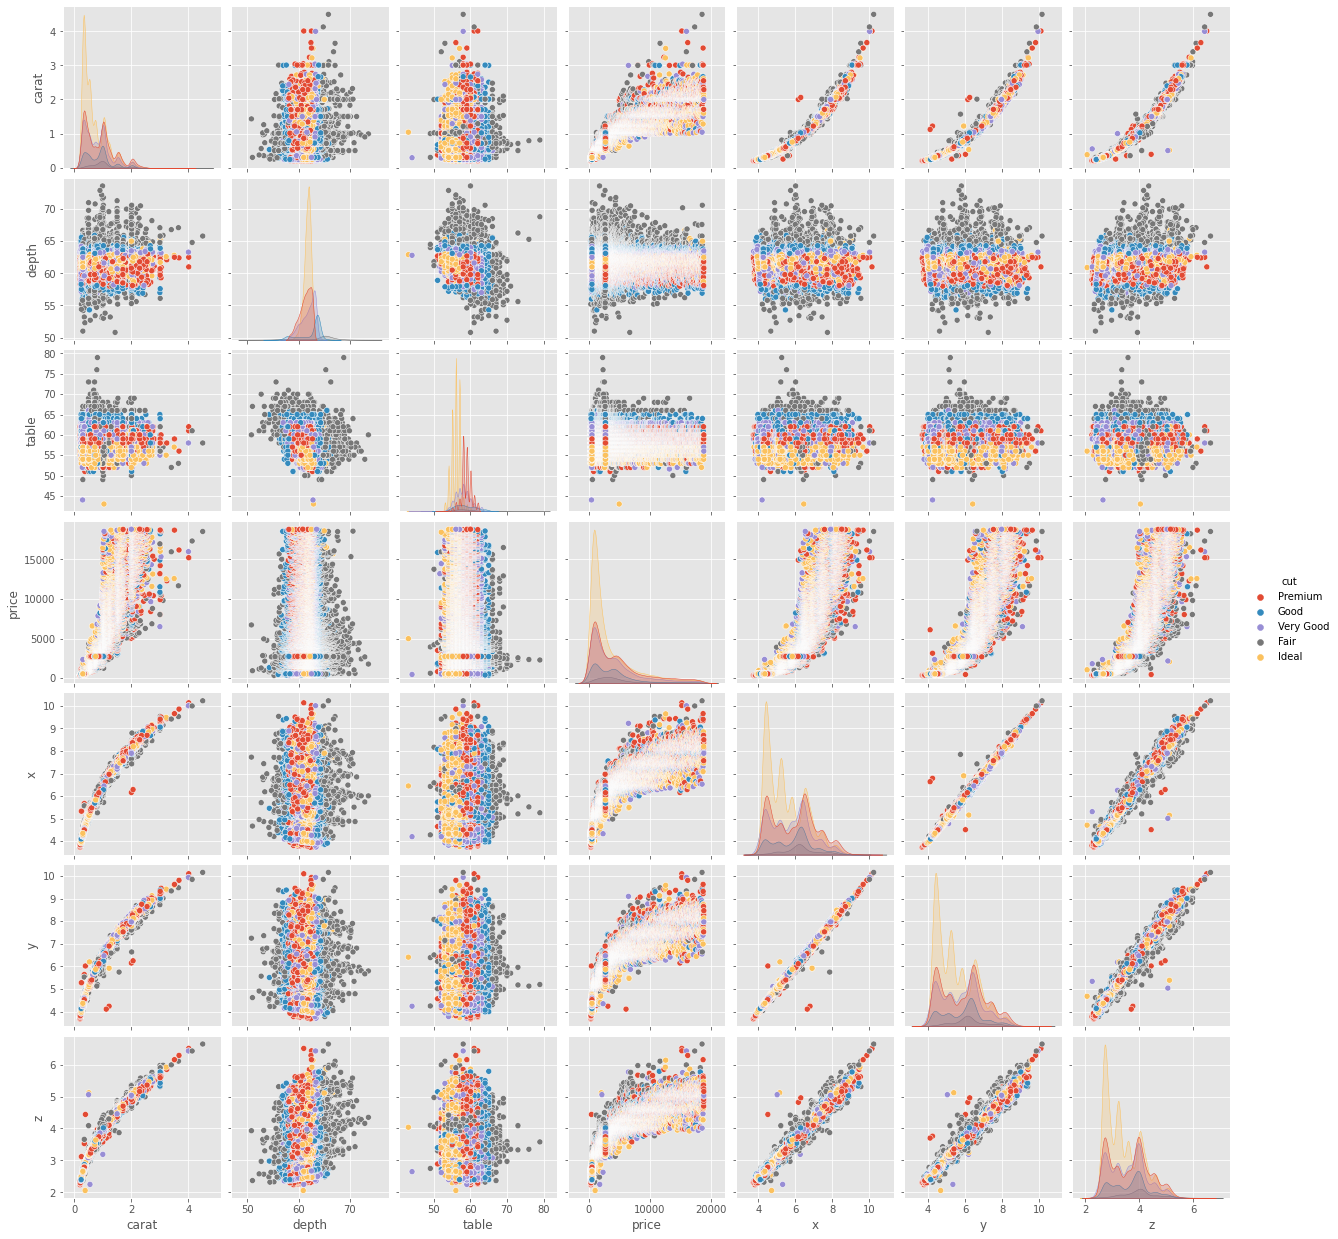

In [24]:
plt.figure(figsize=(10,10))
sns.pairplot(train, hue="cut");

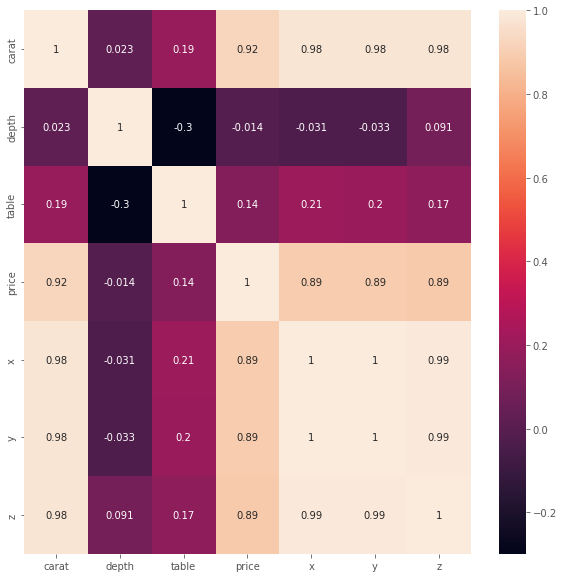

In [25]:
corr_matrix = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True);

* High correlations between features were found in the data.


### The correlations between features and target.

In [26]:
corr_matrix = train.corr()
corr_matrix["price"].sort_values(ascending=False).to_frame()

,price
price,1.000000
carat,0.923994
y,0.891657
x,0.890180
z,0.885475
table,0.136710
depth,-0.014471


* there are features which have high correlations with target.

# Data preprocessing

* From understanding the data, **Cut**, **color** and **clarity** are ordinal variables, So we can deal with them as numerical data. so we will transform them into numbers.

In [27]:
train["cut"].replace({"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}, inplace=True)
test["cut"].replace({"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}, inplace=True)

train["color"].replace({"J":1, "I":2, "H":3, "G":4, "F":5, "E":6, "D":7}, inplace=True)
test["color"].replace({"J":1, "I":2, "H":3, "G":4, "F":5, "E":6, "D":7}, inplace=True)

train["clarity"].replace({"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}, inplace=True)
test["clarity"].replace({"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}, inplace=True)

## Features Engineering.

In [28]:
train["size"] = train["x"] * train["y"] * train["z"] 
test["size"] = test["x"] * test["y"] * test["z"] 

In [29]:
corr_matrix = train.corr()
corr_matrix["price"].sort_values(ascending=False)

price      1.000000
size       0.926006
carat      0.923994
y          0.891657
x          0.890180
z          0.885475
table      0.136710
depth     -0.014471
cut       -0.068890
clarity   -0.156850
color     -0.176365
Name: price, dtype: float64

* we got important features.

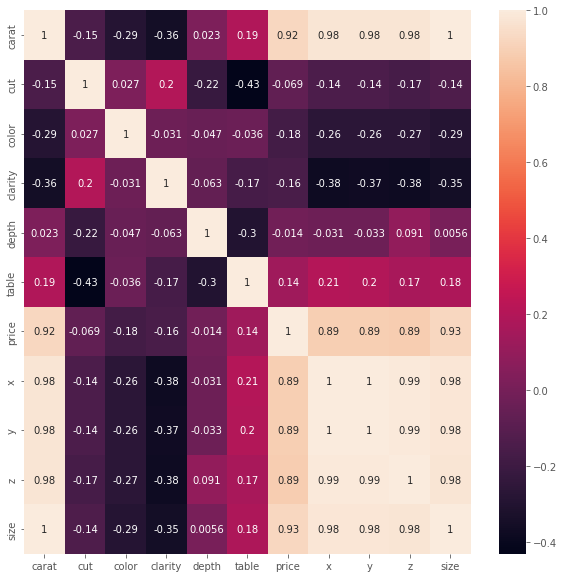

In [30]:
corr_matrix = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True);

### Split train set into features and label.

In [31]:
train_label = train["price"]
train.drop("price", axis=1, inplace=True)

# Select and Train a Model.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


I have chosen many model to train and evaluating.

1. Linear Regression.
2. Ridge Regression.
3. Lasso Regression.
4. KNeighbors Regressor.
5. Decision Tree Regressor.
6. Random Forest Regressor.
7. Gradient Boosting Regressor.
8. XGBoost.

### Train and Evaluate Models.


In [33]:
model = {"Linear Regression":LinearRegression(),   
         "Ridge Regression":Ridge(),  
         "Lasso Regression":Lasso(),
         "K neighbors":KNeighborsRegressor(), 
         "Decision Tree":DecisionTreeRegressor(),
         "Random Forest":RandomForestRegressor(random_state=42),
         "Gradient Boosting":GradientBoostingRegressor(),
         "XGB":XGBRegressor(objective ='reg:linear')
        }


X_train, X_test, y_train, y_test = train_test_split(train, train_label,
                                                        test_size=0.3,
                                                        random_state=42)

train_dic = {"RMSE":[],
             "MAE":[],
             "R2_SCORE":[]}

test_dic = {"RMSE":[],
            "MAE":[],
            "R2_SCORE":[]}

for m in model.keys():
    # create pipeline to scale data first and train model scoend.
    pipe = Pipeline([("scaler", StandardScaler()),
                     ("model", model[m])])
    # train model and make predictions on training data.
    pipe.fit(X_train, y_train)
    train_predictions = pipe.predict(X_train)
    # train model and make predctions on testing data.
    test_predictions = pipe.predict(X_test)
    # evaluate the model.
    # on training data.
    train_dic["RMSE"].append(np.sqrt(mean_squared_error(y_train, train_predictions)))
    train_dic["MAE"].append(mean_absolute_error(y_train, train_predictions))
    train_dic["R2_SCORE"].append(r2_score(y_train, train_predictions))
    # on testing data.
    test_dic["RMSE"].append(np.sqrt(mean_squared_error(y_test, test_predictions)))
    test_dic["MAE"].append(mean_absolute_error(y_test, test_predictions))
    test_dic["R2_SCORE"].append(r2_score(y_test, test_predictions))    

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.194e+09, tolerance: 4.911e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[08:41:29] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


* training scores.

In [34]:
pd.DataFrame(train_dic, index=model.keys())

,RMSE,MAE,R2_SCORE
Linear Regression,1206.062056,788.275372,0.910798
Ridge Regression,1206.069618,788.333502,0.910797
Lasso Regression,1207.749991,789.703036,0.910548
K neighbors,599.378256,309.589513,0.977969
Decision Tree,7.037781,0.406821,0.999997
Random Forest,211.188885,102.192812,0.997265
Gradient Boosting,606.594314,337.586795,0.977435
XGB,348.451423,204.804376,0.992554


* testing scores.

In [35]:
pd.DataFrame(test_dic, index=model.keys())

,RMSE,MAE,R2_SCORE
Linear Regression,1182.549233,769.429344,0.911645
Ridge Regression,1182.628493,769.476693,0.911633
Lasso Regression,1185.040374,770.814364,0.911273
K neighbors,716.739111,372.315937,0.967543
Decision Tree,721.424163,355.313241,0.967117
Random Forest,540.042077,269.068709,0.981573
Gradient Boosting,600.866258,335.153238,0.977189
XGB,544.197231,276.179808,0.981289


* As we see Random Forest has the least RMSE and MAE. but there is a big diffrence between Random Forest's RMSE train score 211.188885 and Random Forest's RMSE test score 540.04207. this means the model is overfitting.
* XGB model has a good score and the gab between the RMSE train score and the RMSE test score is less than the in Random Forest.


* we will choose XGB model and will try to find the best parameters for XGB model.

# Fine-Tune final Model.

Grid Search CV is a geat way to fine the best parameters for machine learning models.

In [36]:
from sklearn.model_selection import GridSearchCV

parameters = {'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb = XGBRegressor()

xgb_grid = GridSearchCV(xgb, parameters, cv = 3,
                        scoring="neg_mean_squared_error",
                        n_jobs = 5,
                        verbose=True)

pipeline_xgb = Pipeline([("scalar",StandardScaler()),
                         ("XGB grid",xgb_grid)])

pipeline_xgb.fit(train, train_label) # train model on the whole train set.
predictions = pipeline_xgb.predict(test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[08:43:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:25] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




* show the best model with the best parameters and the least RMSE Score.

In [37]:
print(f"the best parameters: {xgb_grid.best_estimator_}")
print(f"the final score: {np.sqrt(-xgb_grid.best_score_)}")

the best parameters: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)
the final score: 2377.931418766921


* show features important for model and which features is the most important and which features is least important.

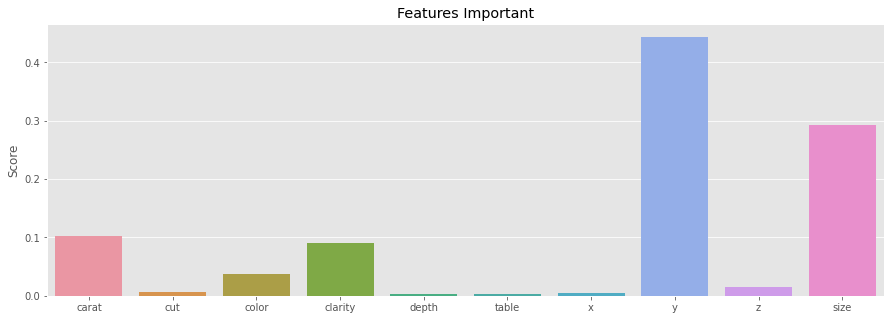

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(x=train.columns,
            y=xgb_grid.best_estimator_.feature_importances_)
plt.title("Features Important")
plt.ylabel("Score");

As we see above, y is the most important feature and table is the least important one.

In [39]:
submission = pd.read_csv("/kaggle/input/shai-ml/sample_submission.csv")
submission["price"] = predictions
submission.to_csv('submission.csv',index=False)